<a href="https://colab.research.google.com/github/mhriyad99/Clinically-Adaptable-Machine-Learning-Model-To-Identify-Early-Appreciable-Feature-of-Diabetes/blob/main/Diabetes_Data_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [10]:
df = pd.read_csv("/content/Diabetes data shylet medical.csv")
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [11]:
df.shape

(520, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [13]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [14]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [16]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [17]:
columns = df.columns

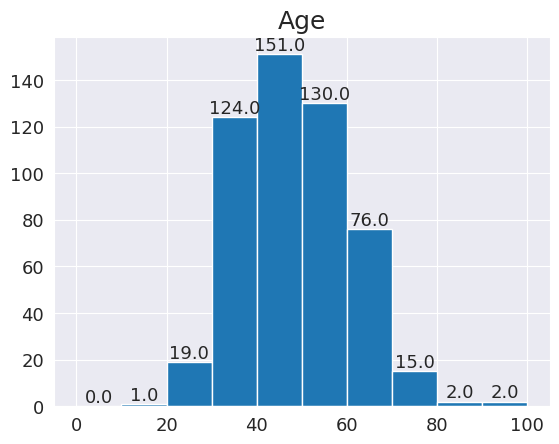

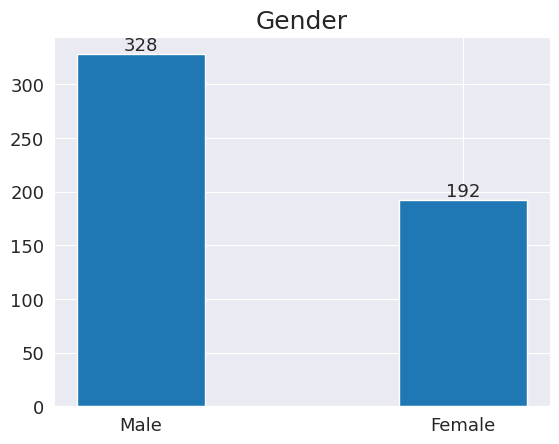

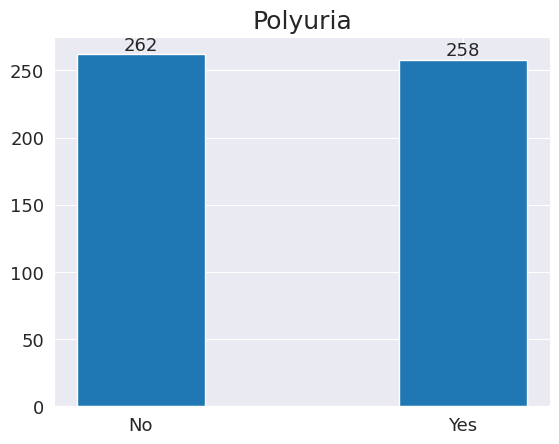

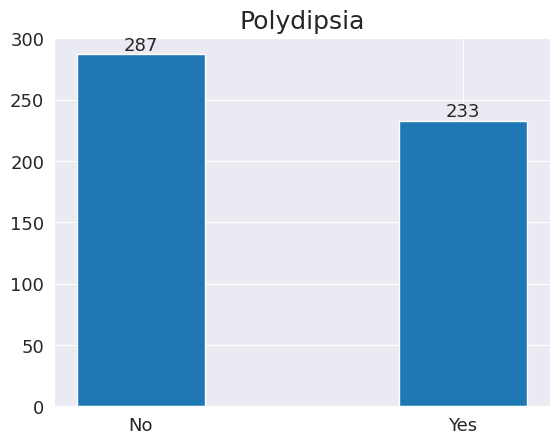

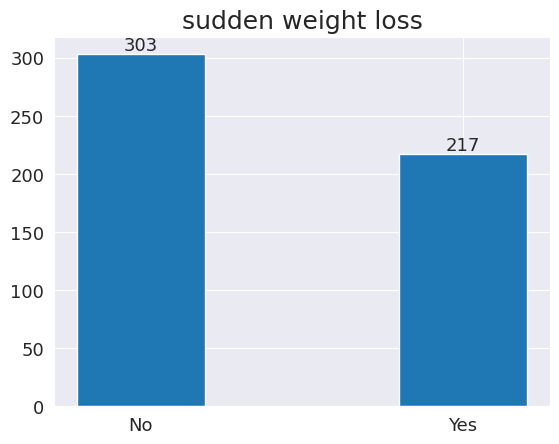

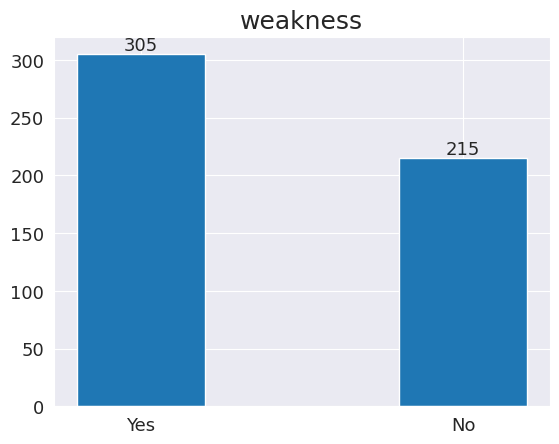

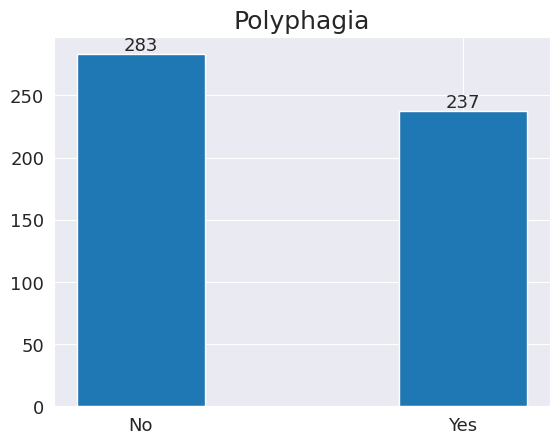

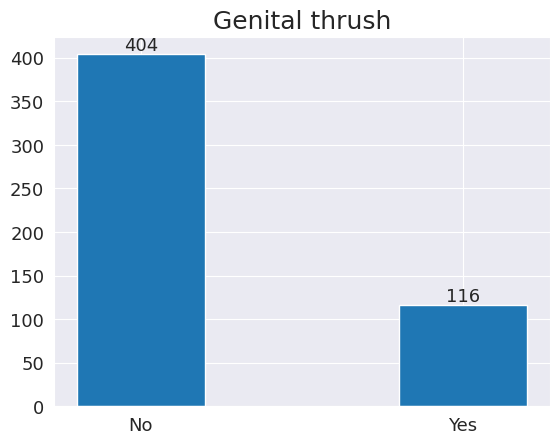

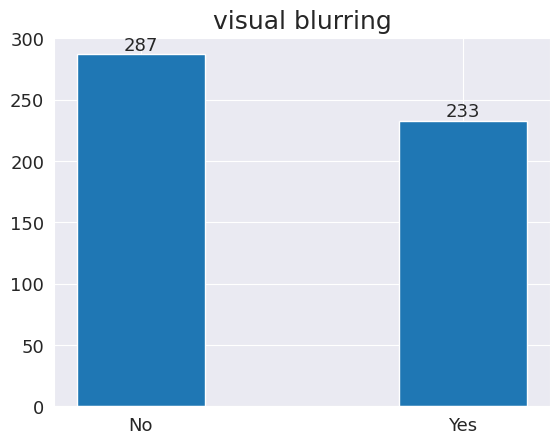

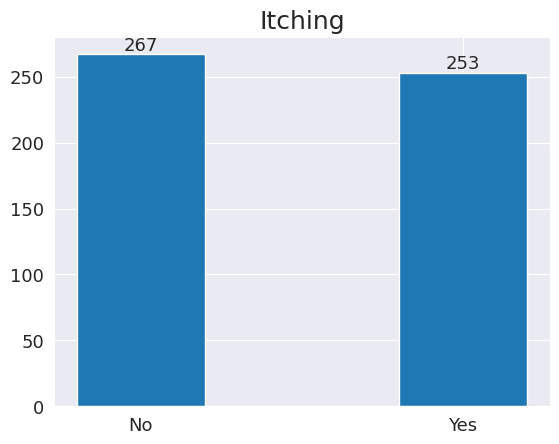

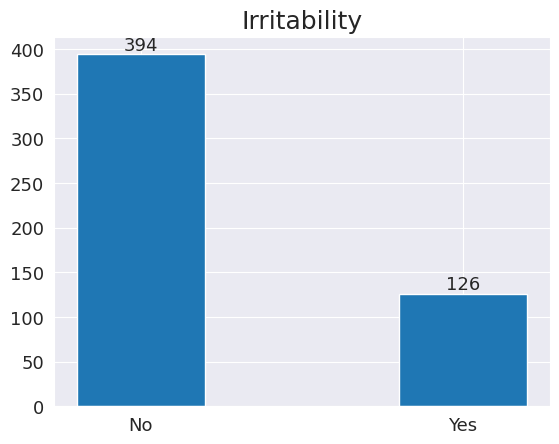

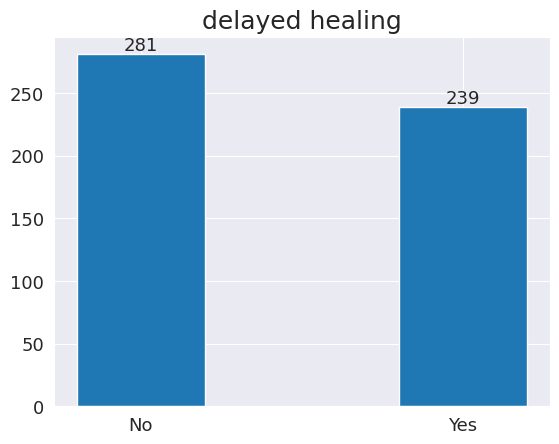

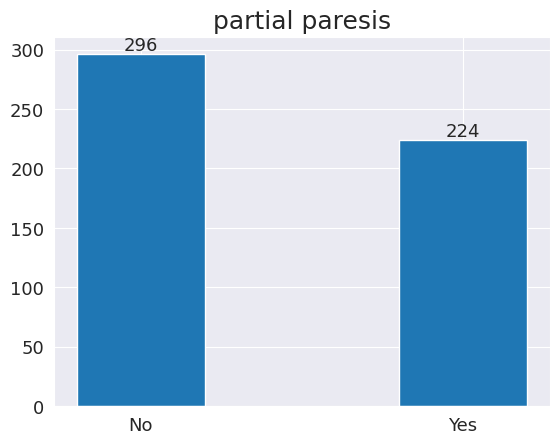

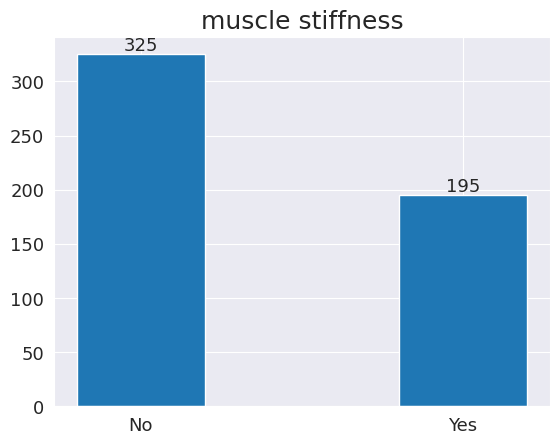

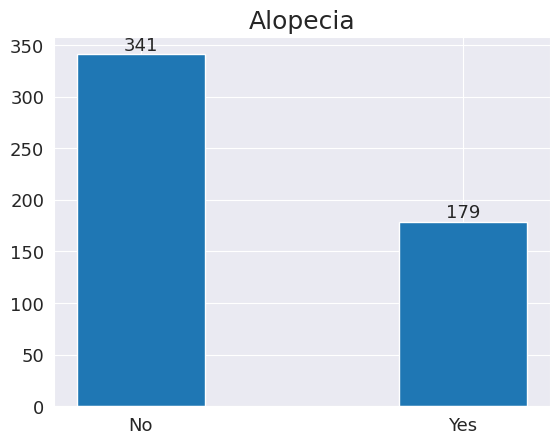

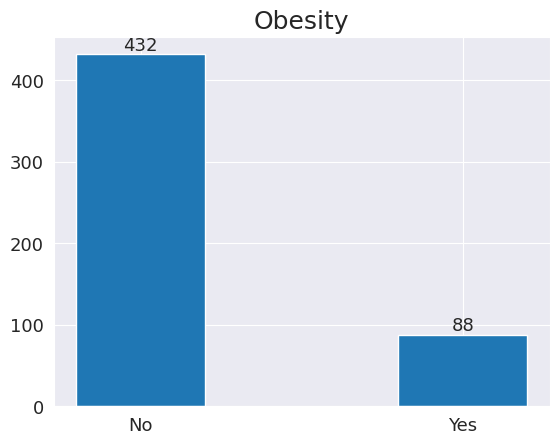

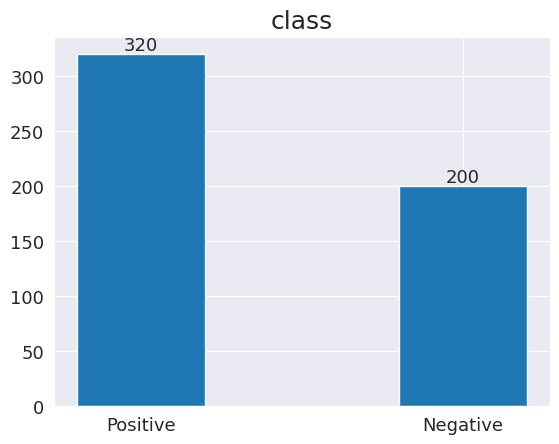

In [20]:
for i in columns:
  if df[i].dtypes == 'O':
    X = df[i].value_counts()
    plt.figure()
    plt.bar(X.index,X.values, width= 0.4)
    for j in range (len(X.values)):
      plt.text(j,X.values[j], s= X.values[j], ha = 'center', va = 'bottom')
    plt.title(i)
  else:
    fig, ax = plt.subplots(1, 1)
    ax.hist(df[i], bins = [0,10,20,30,40,50,60,70,80,90,100])
  
    # Set title
    ax.set_title(i)
  
    # Make some labels.
    rects = ax.patches
    for rect in rects:
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, height,
              ha='center', va='bottom')

Outlier Detection

In [22]:
def univariate_outlier_detection(column):

  print("\n\n-----------------------  {n}  ------------------------".format(n = column))

  mean = df[column].mean()
  median = df[column].median()
  mode = df[column].mode()

  print("\nMean:", mean, "\nMedian: ", median,"\nMode: ", mode[0])

  Q1 = df[column].quantile(q = 0.25)
  Q3 = df[column].quantile(q = 0.75)
  IQR = stat.iqr(df[column])

  print("\n\n1st quartile: ", Q1)
  print("3rd quartile: ", Q3)
  print("Inter-quartile Range: ", IQR)

  l_outlier_range = Q1 - 1.5*IQR
  u_outlier_range = Q3 + 1.5*IQR
  print("\n\nLower outlier range: ", l_outlier_range)
  print("Upper outlier range: ", u_outlier_range)

  print("\n\nNumber of outlier in upper range: ", df[df[column] > u_outlier_range][column].count())
  print("Number of outlier in lower range: ", df[df[column] < l_outlier_range][column].count())
  print("\n% of outlier in upper range: ", (df[df[column] > u_outlier_range][column].count()*100/len(df)))
  print("% of outlier in lower range: ", (df[df[column] < l_outlier_range][column].count()*100/len(df)))

  #Boxplot
  print("Boxplot of column " + column)
  plt.figure()
  ax = sns.boxplot(x = df[column])

  plt.show()



-----------------------  Age  ------------------------

Mean: 48.02884615384615 
Median:  47.5 
Mode:  35


1st quartile:  39.0
3rd quartile:  57.0
Inter-quartile Range:  18.0


Lower outlier range:  12.0
Upper outlier range:  84.0


Number of outlier in upper range:  4
Number of outlier in lower range:  0

% of outlier in upper range:  0.7692307692307693
% of outlier in lower range:  0.0
Boxplot of column Age


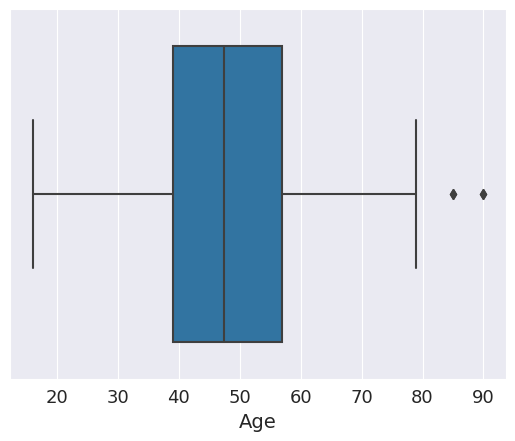

In [23]:
for i in columns:
  if df[i].dtypes == 'int64':
    univariate_outlier_detection(i)

**LabelEncoding**

In [24]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
for column in columns:
  if df[column].dtypes == 'O':
    df[column] = le.fit_transform(df[column])

In [25]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


**Correlation Analysis**

In [27]:
df.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

<Figure size 640x480 with 0 Axes>

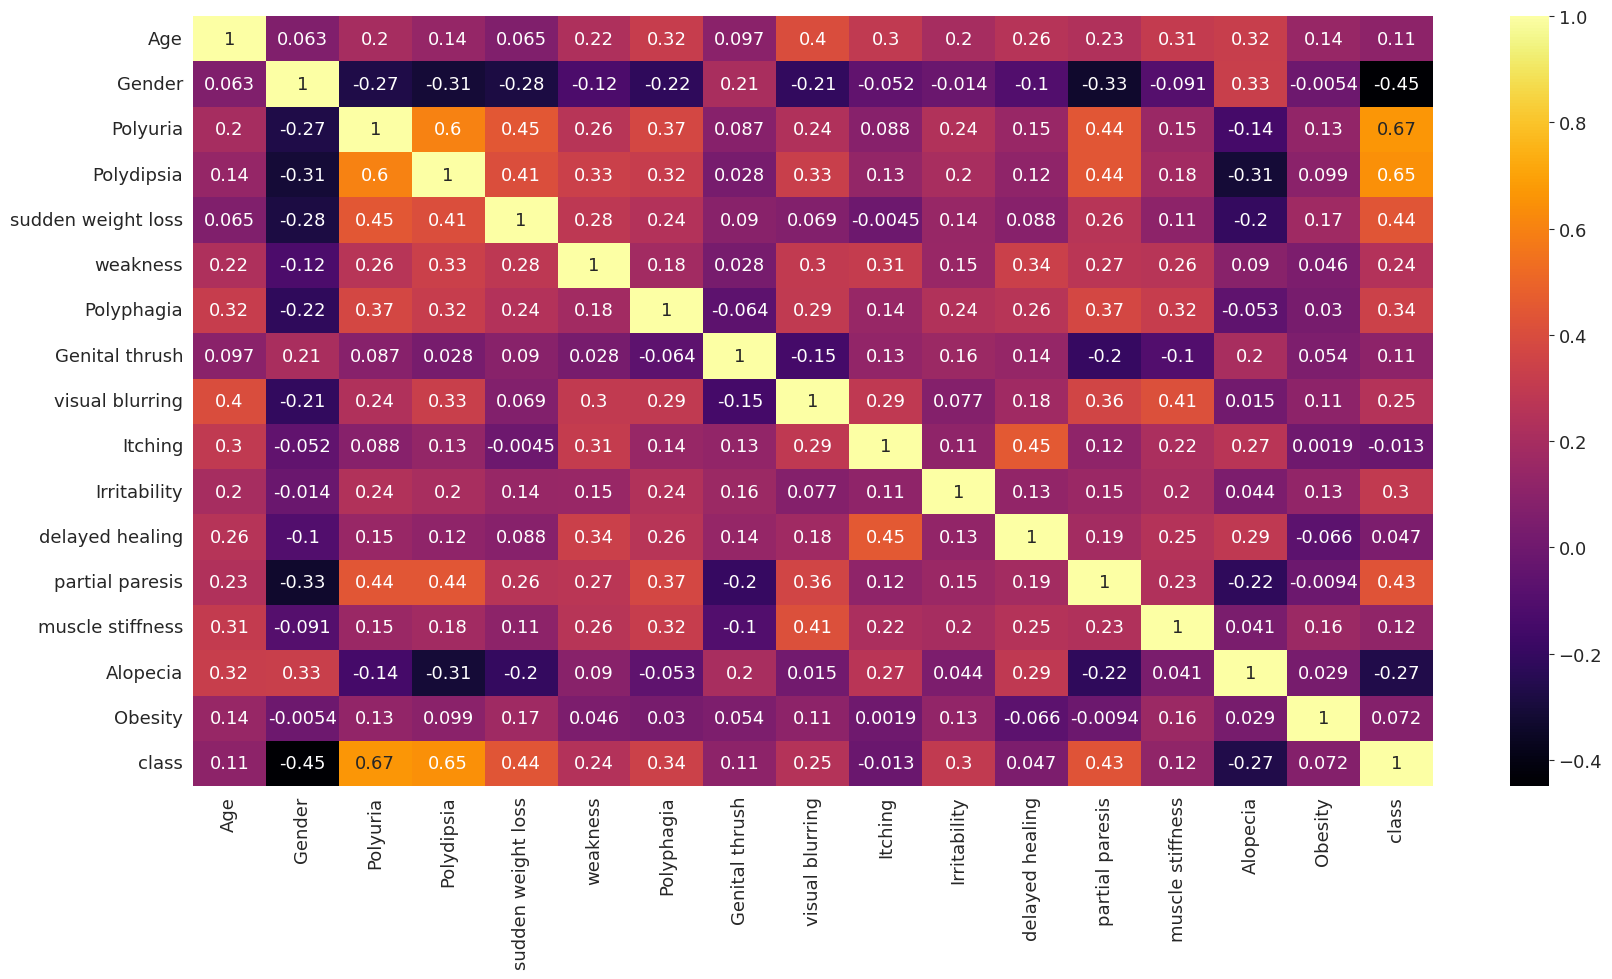

In [28]:
plt.figure()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="inferno", annot=True)

 From above we can see that column :





*   Polydipsia have good correlation coefficient of 0.65 with Diabetes.
*   Polyuria have good correalation coefficient of 0.60 with Polydipsia and it is also a significant feature for detecting Diabetes.



---



---




**T-Test**

In [29]:
from scipy import stats

for i in columns:
  for j in columns:
    if i == j:
      pass
    else:
       t_test, p_value = stats.ttest_ind(a = df[i], b = df[j], equal_var = False)
       if p_value > 0.05 :
         print("\n")
         print(">>> t-test between {} and {}:".format(i,j))
         print("The t-test value = ",t_test, " and p-value= ", p_value)




>>> t-test between Gender and weakness:
The t-test value =  1.461415755830103  and p-value=  0.14420414957370303


>>> t-test between Gender and class:
The t-test value =  0.5114613787330202  and p-value=  0.609136811481503


>>> t-test between Polyuria and Polydipsia:
The t-test value =  1.5531586857334165  and p-value=  0.12069006306493751


>>> t-test between Polyuria and Polyphagia:
The t-test value =  1.303684136492335  and p-value=  0.19263036061331903


>>> t-test between Polyuria and visual blurring:
The t-test value =  1.5531586857334165  and p-value=  0.12069006306493751


>>> t-test between Polyuria and Itching:
The t-test value =  0.30984927081259966  and p-value=  0.7567377745860815


>>> t-test between Polyuria and delayed healing:
The t-test value =  1.1791385433240427  and p-value=  0.23861321578469163


>>> t-test between Polydipsia and Polyuria:
The t-test value =  -1.5531586857334165  and p-value=  0.12069006306493751


>>> t-test between Polydipsia and sudden weig

In [34]:
x = df.drop(columns= ['class'], axis = 1)
y = df['class']

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
fit_feature = SelectKBest(f_classif, k=10)

In [36]:
fit_feature.fit(x,y)

SelectKBest()

In [37]:
Score_col = pd.DataFrame(fit_feature.scores_,columns=['score value'])
Score_col

,score value
0,6.191289
1,130.968787
2,412.738410
3,376.422649
4,121.973731
5,32.585064
6,68.841759
7,6.378216
8,34.917760
9,0.092803


In [38]:
new_col = pd.DataFrame(x.columns)
top_feature = pd.concat([new_col,Score_col],axis=1)
top_feature

,0,score value
0,Age,6.191289
1,Gender,130.968787
2,Polyuria,412.738410
3,Polydipsia,376.422649
4,sudden weight loss,121.973731
5,weakness,32.585064
6,Polyphagia,68.841759
7,Genital thrush,6.378216
8,visual blurring,34.917760
9,Itching,0.092803


In [39]:
top_feature.nlargest(10, 'score value')

,0,score value
2,Polyuria,412.738410
3,Polydipsia,376.422649
1,Gender,130.968787
4,sudden weight loss,121.973731
12,partial paresis,119.046534
6,Polyphagia,68.841759
10,Irritability,51.030999
14,Alopecia,39.926590
8,visual blurring,34.917760
5,weakness,32.585064


In [40]:
X = x.drop(['Age','Genital thrush','Itching','delayed healing','muscle stiffness','Obesity'], axis=1)
X.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia
0,1,0,1,0,1,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,1
2,1,1,0,0,1,1,0,0,0,1
3,1,0,0,1,1,1,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [42]:
# To display the metric scores more cleanly
def display_test_scores(y_test, y_pred):
  print("---------------- Test----------------")
  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred)
  re = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  rocs = roc_auc_score(y_test, y_pred)
  print("Accuracy score: ",acc)
  print("Precision: ", pre)
  print("Recall: ", re)
  print("f1 Score: ", f1)
  print("Roc auc score:" , rocs)

In [43]:
def display_train_scores(y_train, y_pred):
  print("---------------- Train ----------------")
  acc = accuracy_score(y_train, y_pred)
  pre = precision_score(y_train, y_pred)
  re = recall_score(y_train, y_pred)
  f1 = f1_score(y_train, y_pred)
  rocs = roc_auc_score(y_train, y_pred)
  print("Accuracy score: ",acc)
  print("Precision: ", pre)
  print("Recall: ", re)
  print("f1 Score: ", f1)
  print("Roc auc score:" , rocs)

# **DecisionTreeClassifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred= classifier.predict(X_test) 
display_test_scores(y_test, y_pred)

---------------- Test----------------
Accuracy score:  0.9423076923076923
Precision:  1.0
Recall:  0.9104477611940298
f1 Score:  0.953125
Roc auc score: 0.9552238805970149


In [46]:
y_pred_1= classifier.predict(X_train)
display_train_scores(y_train, y_pred_1)

---------------- Train ----------------
Accuracy score:  0.9807692307692307
Precision:  0.9841897233201581
Recall:  0.9841897233201581
f1 Score:  0.9841897233201581
Roc auc score: 0.9798249230097724


# **LogisticRegression**

In [47]:
from sklearn.linear_model import LogisticRegression  
classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred_log= classifier_log.predict(X_test)
display_test_scores(y_test, y_pred_log)

---------------- Test----------------
Accuracy score:  0.8846153846153846
Precision:  0.9365079365079365
Recall:  0.8805970149253731
f1 Score:  0.9076923076923077
Roc auc score: 0.8862444534086326


In [49]:
y_pred_log_1= classifier_log.predict(X_train)
display_train_scores(y_train, y_pred_log_1)

---------------- Train ----------------
Accuracy score:  0.90625
Precision:  0.9246031746031746
Recall:  0.9209486166007905
f1 Score:  0.9227722772277228
Roc auc score: 0.9021920997114382
